# **Import Modules**

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import seaborn as sns #sstatistical  data visualisation 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

import xgboost

from xgboost import XGBRegressor



from sklearn import metrics
from sklearn.metrics import mean_squared_error

# **Import Data**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# **Data Wrangling**

In [3]:
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
#remove ID column
df = train_df.drop('Id', axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


We can see there are:
- **2 Integer** type features.
- **6 Float type** features.
- **3 Object type** features.

So, we have to encode those categorical features as we can feed only numerical features into the machine learning model.

# **Data Cleaning**

Start cleaning data, first find out if there is any NULL values?

In [7]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Then, find out duplicated data.

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43147    False
43148    False
43149    False
43150    False
43151    False
Length: 43152, dtype: bool

In [9]:
df.duplicated().sum()

97

In [10]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

In [11]:
df.shape

(43055, 10)

# **Data Preprocessing**

* **Encoding Categorical Variables:** convert categorical variables to numerical variables where the measurement or number has a numerical meaning.

In [12]:
# #one hot encoding method
# df = pd.get_dummies(df)
# df.head()

Using Ordinal Encoding:

In [13]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)

Categorical variables: ['cut', 'color', 'clarity']


In [14]:
# Apply label_encoder to each column with categorical data
# label_encoder = LabelEncoder()
# for col in object_cols:
#     df[col] = label_encoder.fit_transform(df[col])

# le = LabelEncoder()
# df[object_cols] = df[object_cols].apply(le.fit_transform)

#encoder = OrdinalEncoder()
#df[object_cols] = encoder.fit_transform(df[object_cols])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000
mean,0.797752,61.746373,57.459798,3930.016235,5.731555,5.735063,3.538528
std,0.473198,1.435066,2.234325,3984.939986,1.120732,1.148389,0.707922
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


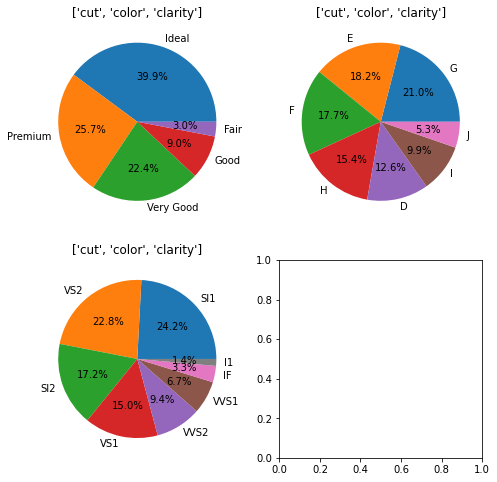

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
c,r= 0, 0
for object_col in object_cols:
    x= df[object_col].value_counts()

    axes[r, c].pie(x, labels= x.index, autopct= '%1.1f%%')
    axes[r, c].set_title(object_cols)
    c= c + 1
    if c == 2:
        r= r + 1
        c= 0

    
plt.show()

# Discover and Visualize the Data

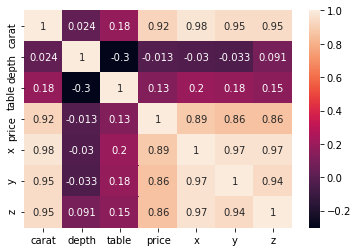

In [17]:
df_corr= df.corr()
sns.heatmap(df_corr, annot= True)
plt.show()

> there are a strong linear relation between (`carat`, `x`, `y`, `z`) columns and `price` column


* **Handling outliers:** find out if there is outliers in the data that will affect the model.

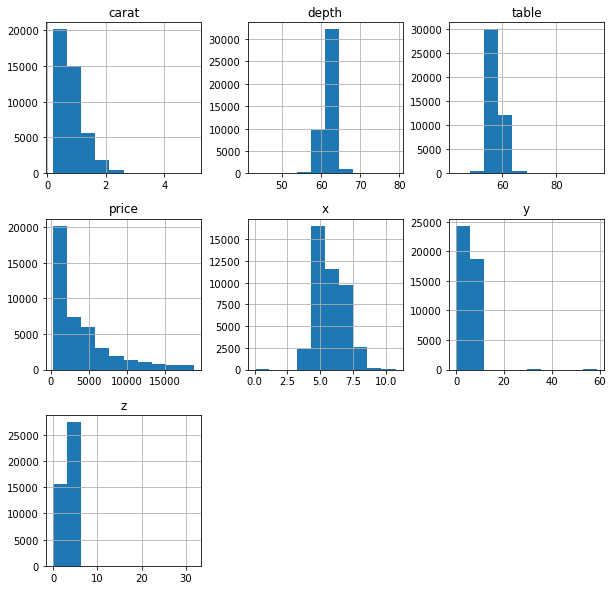

In [18]:
df.hist(figsize = (10,10));

> the data has outliers. `depth`, `table`, `y` and `x` columns are normaly distributed. other columns is positive (left) skewed

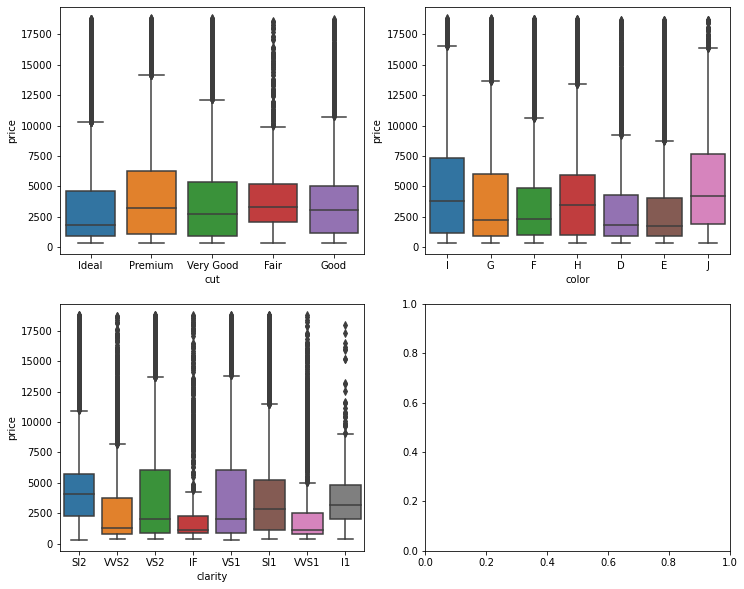

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
r, c =0, 0
for object_col in object_cols:
    sns.boxplot(ax=axes[r, c], data=df, y='price', x= df[object_col])
    c= c + 1
    if c == 2:
        r= r + 1
        c= 0
    
plt.show()

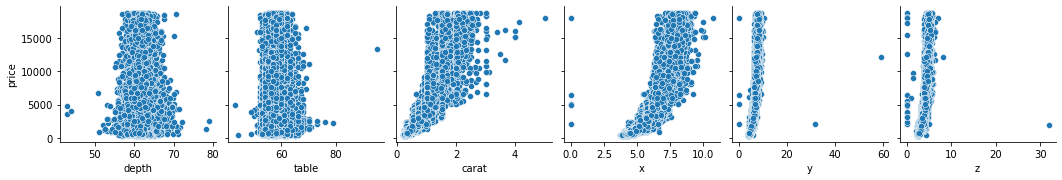

In [20]:
sns.pairplot(data=df,x_vars=["depth","table","carat",'x', 'y','z'],y_vars="price",diag_kind=None)

Graph here show some zero values we didn't detect before. **Let's make sure.**

In [21]:
temp = df[['x','y','z','depth','table','carat','price']].replace(0,np.NaN)
temp.isnull().sum()

x         5
y         4
z        17
depth     0
table     0
carat     0
price     0
dtype: int64

In [22]:
#Dropping dimensionless diamonds
df.drop(df[df['x']==0].index,inplace=True)
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)
df.shape

(43038, 10)

After delete **dimensionless data** [this is missing information if included will affect the outcome of the model results], let's find out more close to **outliers**.

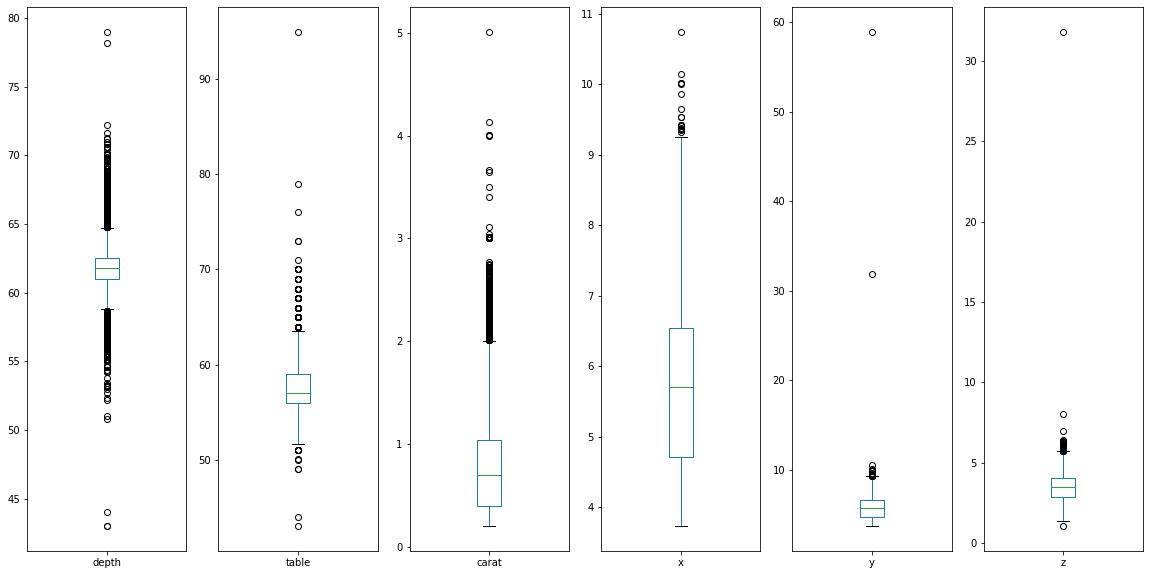

In [23]:
data = df[['depth', 'table', 'carat', 'x', 'y', 'z']]
data.plot(kind='box',figsize=(20,10),subplots=True)
plt.show()

In [24]:
df.nlargest(5, "x")

,carat,cut,color,clarity,depth,table,price,x,y,z
26886,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
26030,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
18840,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
7389,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
31151,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43


In [25]:
df.nlargest(5, "y")

,carat,cut,color,clarity,depth,table,price,x,y,z
35359,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
40663,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12
26886,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
26030,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
7389,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31


In [26]:
df.nlargest(5, "z")

,carat,cut,color,clarity,depth,table,price,x,y,z
10541,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
35359,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
26886,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
31151,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
16302,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38


In [27]:
print(f"rows= {df.shape[0]}")
largest_df= df[(df['x'] == 10.74) | (df['y'] >= 31.80) | (df['z'] == 31.80)]
df.drop(largest_df.index, inplace= True)
print(f"rows= {df.shape[0]}")


rows= 43038
rows= 43034


In [28]:
#Dropping the outliers. 
#df = df[(df["y"]<20)]
#df = df[(df["z"]<10) & (df["z"]>2)]
#df = df[(df["carat"]<4)]
#df = df[(df["table"]<80) & (df["table"]>45)]
#df = df[(df["depth"]<80) & (df["depth"]>45)]
df.shape

(43034, 10)

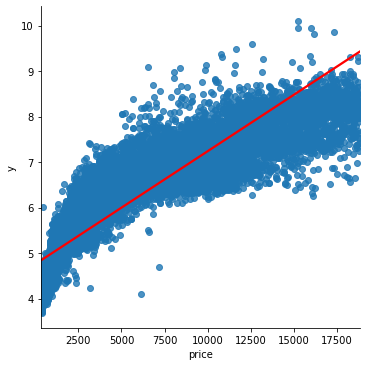

In [29]:
sns.lmplot(x="price", y="y", data=df, line_kws={"color": 'red'})

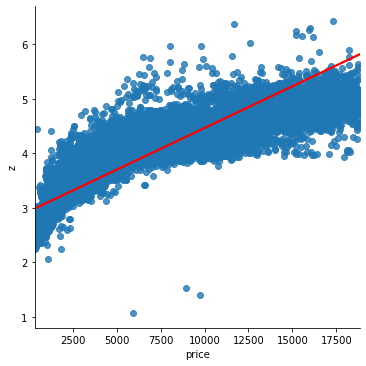

In [30]:
sns.lmplot(x="price", y="z", data=df, line_kws={"color": 'red'})

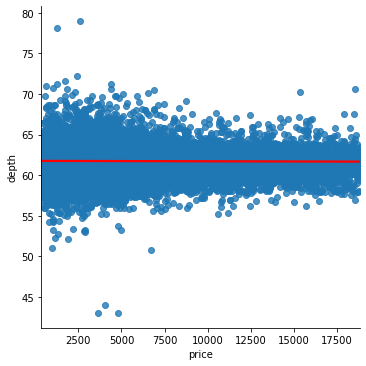

In [31]:
sns.lmplot(x="price", y="depth", data=df, line_kws={"color": 'red'})

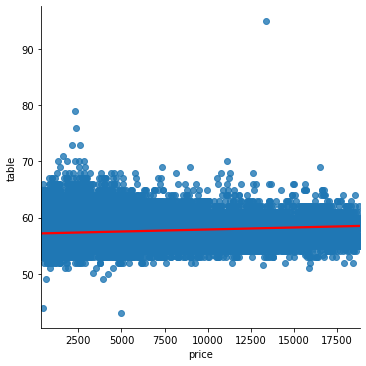

In [32]:
sns.lmplot(x="price", y="table", data=df, line_kws={"color": 'red'})

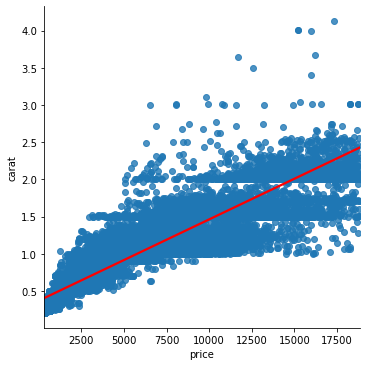

In [33]:
sns.lmplot(x="price", y="carat", data=df, line_kws={"color": 'red'})

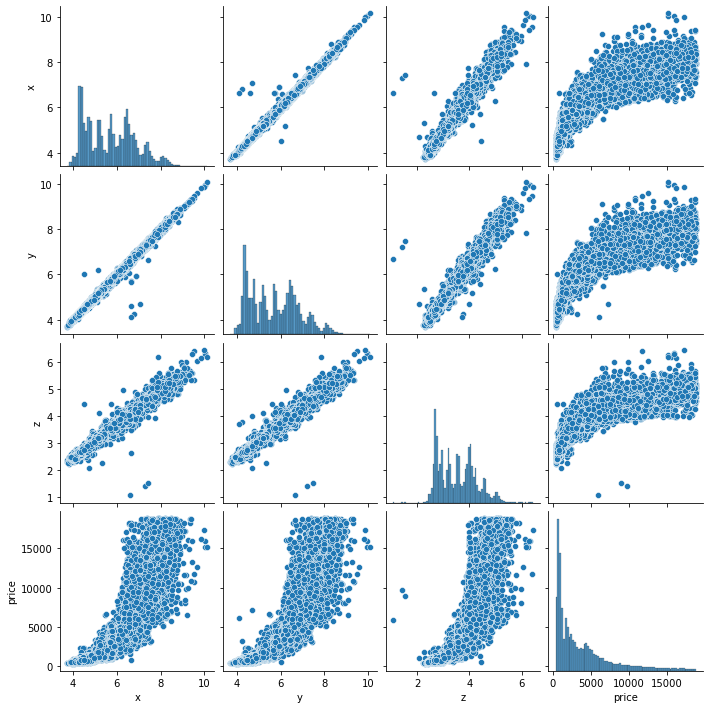

In [34]:
sns.pairplot(df[['x', 'y', 'z', 'price']])
plt.show()

In [35]:
# def iqr_outliers(column):
#     Q1,Q3 = np.percentile(column , [25,75])
#     iqr = Q3 - Q1
#     lower_range = Q1 - (1.5 * iqr)
#     upper_range = Q3 + (1.5 * iqr)
#     return lower_range,upper_range  

In [36]:
# caratlower,caratupper = iqr_outliers(df.carat)
# df.drop(df[ (df.carat > caratupper) | (df.carat < caratlower) ].index , inplace=True)

# **Feature Engineering**

In [37]:
# df['volume'] = df['x']*df['y']*df['z']

## Combining x,y,z with one column called size

In [38]:
df['size']=df['x']*df['y']*df['z']
df.drop(labels=['x','y','z'], axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,size
0,1.06,Ideal,I,SI2,61.8,57.0,4270,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,115.315200


In [39]:
D_Train_num =df.select_dtypes(include=[np.number])

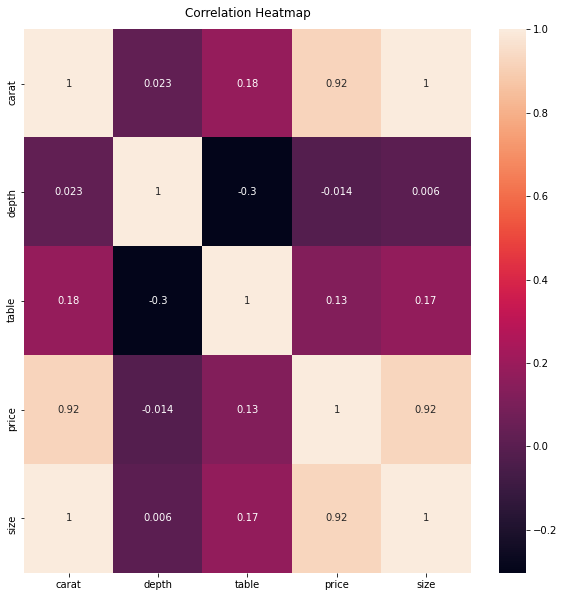

In [40]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# **Model Building**

In [41]:
# Assigning the featurs as X and trarget as y
X= df.drop(["price"],axis =1)
y= df["price"]


In [42]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(D_Train_num)
print(X_train_sc[:,0])

[ 0.55588386  1.50832806 -1.01035771 ... -0.75637259 -1.03152314
 -0.98919229]


## Getting OrdinalEncoder to encode categorical values

In [43]:
from sklearn.preprocessing import OrdinalEncoder
categories = [
    ['Ideal','Premium','Very Good','Good','Fair'],
    ['D','E','F','G','H','I','J'],
    ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2','I1']
]

ordinal_encoder = OrdinalEncoder(categories=categories)
D_Train_encoded=object_cols


dir(ordinal_encoder)



['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_X',
 '_check_n_features',
 '_fit',
 '_get_feature',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_data',
 'categories',
 'dtype',
 'fit',
 'fit_transform',
 'get_params',
 'handle_unknown',
 'inverse_transform',
 'set_params',
 'transform',
 'unknown_value']

In [44]:
print(ordinal_encoder.categories)

[['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ['D', 'E', 'F', 'G', 'H', 'I', 'J'], ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']]


In [45]:
## Splitting the data into test and train sets

In [46]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(df, test_size=0.2, random_state=42)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X_train=train_set.drop("price",axis=1)
y_train=train_set['price'].copy()
X_test=test_set.drop("price",axis=1)
Y_test=test_set['price'].copy()
Diamond_num = X_train.drop(['cut','color','clarity'], axis=1)
num_attribs=list(Diamond_num)
cat_attribs = ['cut','color','clarity']
num_pipeline = Pipeline([
 ('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", ordinal_encoder, cat_attribs)])
Diamond_prepared = full_pipeline.fit_transform(X_train)

In [48]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_model = make_pipeline(full_pipeline,RandomForestRegressor(n_estimators=100, random_state=42))
rand_forest_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'size']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                   

In [49]:
XGB_model = make_pipeline(full_pipeline,XGBRegressor())
XGB_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'size']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                   

# Fine-Tuning the model's hyperparameters

In [50]:
param_grid={
    'XGB__max_depth': [1, 5, None],
    'XGB__reg_alpha': [0, 50,100,150],
    'XGB__reg_lambda': [.15,.20,.10,0],
    'XGB__n_estimators': [10,50,100,150,200],
    'XGB__learning_rate': [.15,.17]
}

In [51]:
XGboost= Pipeline([
 ("preprocessing", full_pipeline),
 ("XGB", XGBRegressor()),
])

grid_search = GridSearchCV(XGboost, param_grid, cv=5,scoring='neg_root_mean_squared_error',return_train_score = True,n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'size']),
                                                                        ('cat',
                                                                         OrdinalEncoder(categories=[['Ideal',
                                                                                                     'Prem

In [52]:
grid_search.best_params_

{'XGB__learning_rate': 0.15,
 'XGB__max_depth': None,
 'XGB__n_estimators': 100,
 'XGB__reg_alpha': 150,
 'XGB__reg_lambda': 0.1}

In [53]:
final_model = grid_search.best_estimator_

# using ensemble models

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(full_pipeline,GradientBoostingRegressor())
model.fit(X_train, y_train)
model.score(X_test,Y_test)

0.9756811270404083

In [55]:
#bagging 
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
model = make_pipeline(full_pipeline,BaggingRegressor(tree.DecisionTreeRegressor(random_state=1)))
model.fit(X_train, y_train)
model.score(X_test,Y_test)


0.9783323595598403

In [56]:
from sklearn.ensemble import AdaBoostRegressor
model = make_pipeline(full_pipeline,AdaBoostRegressor())
model.fit(X_train, y_train)
model.score(X_test,Y_test)



0.9116647406817397

# **Prepare Testing**

In [57]:
test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


Applying what we made in the training data to be fit with testing data.

In [58]:
# test_df['volume'] = test_df['x']*test_df['y']*test_df['z']

In [59]:
df_test=pd.read_csv('test.csv')
df_test['size']=df_test['x']*df_test['y']*df_test['z']
df_test.drop(labels=['x','y','z'], axis=1,inplace=True)
df_test.head()

,Id,carat,cut,color,clarity,depth,table,size
0,1,0.34,Ideal,G,VVS2,61.1,57.0,55.686400
1,2,0.71,Premium,E,VS2,62.7,58.0,116.719456
2,3,0.44,Very Good,I,VS1,62.8,56.0,71.889720
3,4,0.81,Premium,E,SI2,60.1,59.0,134.037855
4,5,0.40,Ideal,G,VVS1,61.2,56.0,66.435840


In [60]:
# #one hot encoding method for test
# test_df = pd.get_dummies(test_df)
# test_df.head()

In [61]:
id_test= df_test['Id']
df_test.drop(labels= ['Id'], axis=1,inplace=True)

In [62]:
y_pred= final_model.predict(df_test)

In [63]:
submission = pd.DataFrame({"id": id_test, "price": y_pred})

In [64]:
submission.to_csv('submission.csv',index=None)